In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import os


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point

from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [5]:
track = pd.read_excel("D:\PAPERBANJIR\EXCEL PROPERTI\clssyday14-16.xlsx", sheet_name="filterMCC")
CCC = pd.read_excel("D:\PAPERBANJIR\EXCEL PROPERTI\clssyday14-16.xlsx", sheet_name="filterCCC")
DLL = pd.read_excel("D:\PAPERBANJIR\EXCEL PROPERTI\clssyday14-16.xlsx", sheet_name="filterDLL")
DSL = pd.read_excel("D:\PAPERBANJIR\EXCEL PROPERTI\clssyday14-16.xlsx", sheet_name="filterDSL")

Text(0, 0.5, 'y')

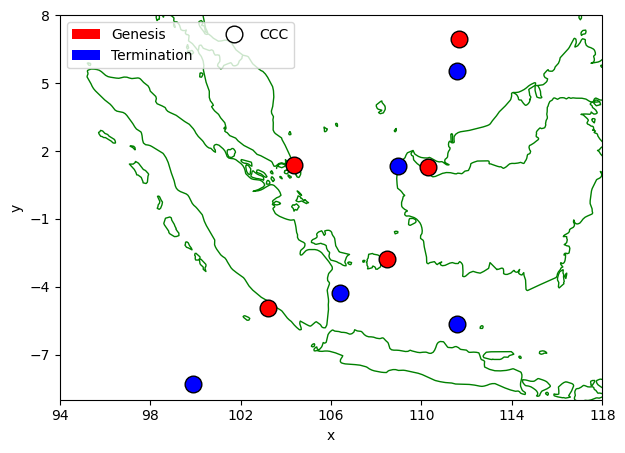

In [6]:
points_ccc_first = [Point(x, y) for x, y in zip(CCC['first_centroid_x'], CCC['first_centroid_y'])]
points_ccc_last = [Point(x, y) for x, y in zip(CCC['last_centroid_x'], CCC['last_centroid_y'])]

plt.figure(figsize=(7, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([94, 118, -9, 8], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(94, 119, 4), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(8, -9, -3), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='g')
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='g')

for i, (point_first, point_last) in enumerate(zip(points_ccc_first, points_ccc_last)):
    plt.plot(point_first.x, point_first.y, 'o', markersize=12, color='red', markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree())
    plt.plot(point_last.x, point_last.y, 'o', markersize=12, color='blue', markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree())

#    ax.text(point_first.x, point_first.y, CCC['first_time'].iloc[i], fontsize=9, ha='center', va='center', color='k', transform=ccrs.PlateCarree())
#    ax.text(point_last.x, point_last.y, CCC['last_time'].iloc[i], fontsize=9, ha='center', va='center', color='k', transform=ccrs.PlateCarree())

legend_elements = [Patch(facecolor='red', label='Genesis'),
                   Patch(facecolor='blue', label='Termination')]

custom_legend = [Line2D([], [], color='white', marker='o',markeredgecolor='black',  markersize=12, linestyle='None', label='CCC')]

combined_legend = legend_elements + custom_legend

plt.legend(handles=combined_legend, loc='upper left', ncol=2)
plt.xlabel('x')
plt.ylabel('y')

#output = 'D:/PAPERBANJIR/OUTPUT/'
#plt.savefig(os.path.join(output, 'genesisnterminate.png'), bbox_inches='tight', dpi=900)

In [ ]:
points_first = [Point(x, y) for x, y in zip(track['first_centroid_x'], track['first_centroid_y'])]
points_last = [Point(x, y) for x, y in zip(track['last_centroid_x'], track['last_centroid_y'])]

dll_f = [Point(x, y) for x, y in zip(DLL['first_centroid_x'], DLL['first_centroid_y'])]
dll_l = [Point(x, y) for x, y in zip(DLL['last_centroid_x'], DLL['last_centroid_y'])]

dsl_f = [Point(x, y) for x, y in zip(DSL['first_centroid_x'], DSL['first_centroid_y'])]
dsl_l = [Point(x, y) for x, y in zip(DSL['last_centroid_x'], DSL['last_centroid_y'])]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([94, 120, -12, 8], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
gl1 = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.7, linestyle='--', x_inline=False, y_inline=False)
gl1.ylocator = MultipleLocator(5)
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xlines = False
gl1.ylines = False


for point in dsl_l:
    plt.plot(point.x, point.y, 'o', markersize=6, color='blue', markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree())
for point in dsl_f:
    plt.plot(point.x, point.y, 'o', markersize=6, color='red', markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree())
    
    
for point in points_first:
    plt.plot(point.x, point.y, 'X', color='red', markersize=15, markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree(), label='Genesis')

for point in points_last:
    plt.plot(point.x, point.y, 'X', color='blue', markersize=15, markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree(), label='Termination')
    
# connected line
#for point_first, point_last in zip(points_first, points_last):
 #   plt.plot([point_first.x, point_last.x], [point_first.y, point_last.y], color='green', linestyle='-', linewidth=3, transform=ccrs.PlateCarree())
    
for point in dll_f:
    plt.plot(point.x, point.y, '^', markersize=8, color='red', markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree())
for point in dll_l:
    plt.plot(point.x, point.y, '^', markersize=8, color='blue', markeredgewidth=1, markeredgecolor='black', transform=ccrs.PlateCarree())
    
legend_elements = [Patch(facecolor='red', label='Genesis'),
                   Patch(facecolor='blue', label='Termination')]

custom_legend = [Line2D([], [], color='white', marker='X', markersize=15, markeredgecolor='black', linestyle='None', label='MCC'),
                 Line2D([], [], color='white', marker='^', markersize=8, markeredgecolor='black', linestyle='None', label='DLL'),
                 Line2D([], [], color='white', marker='o', markersize=6, markeredgecolor='black', linestyle='None', label='DSL')]

combined_legend = legend_elements + custom_legend

plt.legend(handles=combined_legend, loc='lower left', ncol=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#output = 'D:/PAPERBANJIR/OUTPUT/'
#plt.savefig(os.path.join(output, 'rev_genesisnterminate.png'), bbox_inches='tight', dpi=900)

D:\Anaconda-DATA\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
D:\Anaconda-DATA\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0, 0.5, 'Latitude')